**<div style ="text-align:center;color:black;font-size:30px;">Employee Attrition Analysis and 
Prediction </div>**

#### Import the Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Data Collection & Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
employee_df = pd.read_csv(r"C:\Users\vinuv\Downloads\Employee-Attrition - Employee-Attrition.csv")

In [6]:
# printing the first 5 rows of the dataframe
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# getting information about the dataset
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# checking the missing values in each column
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# getting some statistical measures about the data
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

#### Attrition Distribution 

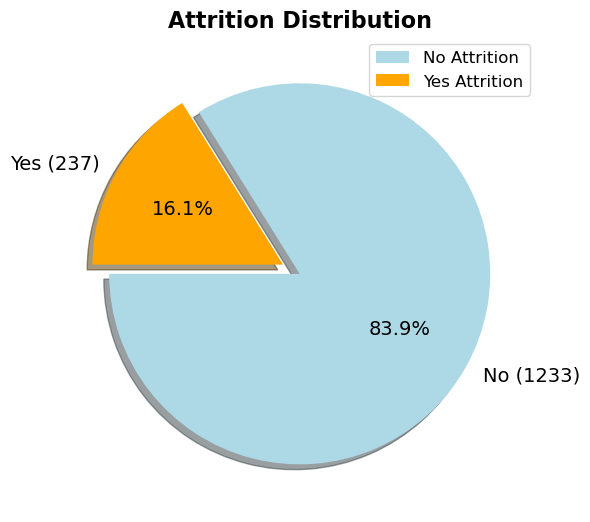

In [12]:
# Plot Attrition Distribution
plt.figure(figsize=(6, 6))
attrition_counts = employee_df['Attrition'].value_counts()

# Create labels with both count and percentage
labels = [f"{label} ({count})" for label, count in zip(["No", "Yes"], attrition_counts)]

# Create a pie chart
plt.pie(attrition_counts, 
        autopct='%1.1f%%', 
        colors=["lightblue", "orange"], 
        labels=labels,  # Use the new labels with counts
        explode=(0, 0.1), 
        shadow=True,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title("Attrition Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label for better aesthetics

# Add a legend for clarity
plt.legend(["No Attrition", "Yes Attrition"], loc="upper right", fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## 📊 Key Insights from Attrition Distribution:

- **🚀 Retention is High:** **83.9% of employees stay**, indicating overall strong retention.
- **⚠️ Attrition Concern:** **16.1% of employees leave**, signaling potential workforce stability risks.
- **📈 Strategic Focus Needed:** Identifying key drivers behind attrition can help **reduce talent loss** and improve engagement.


#### Gender Distribution 

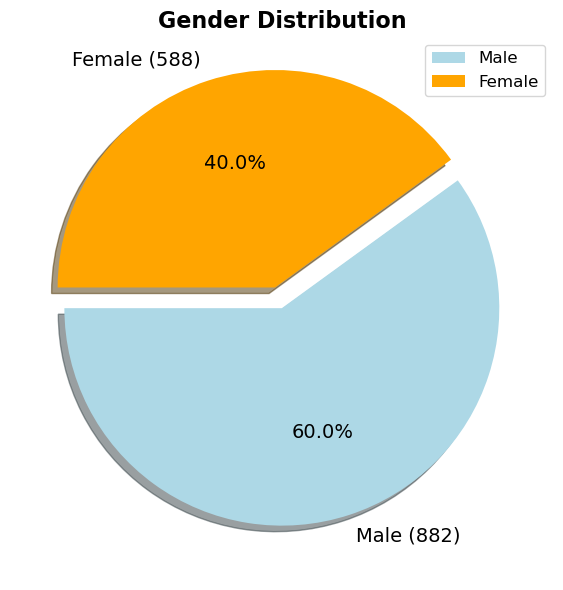

In [15]:
# Plot Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = employee_df['Gender'].value_counts()

# Create labels with both count and percentage
labels = [f"{label} ({count})" for label, count in zip(["Male", "Female"], gender_counts)]

# Create a pie chart
plt.pie(gender_counts, 
        autopct='%1.1f%%', 
        colors=["lightblue", "orange"], 
        labels=labels,  # Use the new labels with counts
        explode=(0, 0.1), 
        shadow=True,
        startangle=180,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title("Gender Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove y-axis label for better aesthetics

# Add a legend for clarity
plt.legend(["Male", "Female"], loc="upper right", fontsize=12)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



## 📊 Key Insights from Gender Distribution:

- **👥 Workforce Composition:** The organization has **60% male and 40% female employees**, showing a diverse workforce.
- **⚖️ Gender Balance:** While there is **a gap**, the female representation is **substantial**, indicating inclusivity efforts.
- **📈 Opportunity for Diversity Growth:** Focused initiatives can help **bridge the gender gap** and create a more balanced workplace.


#### Business Travel Distribution

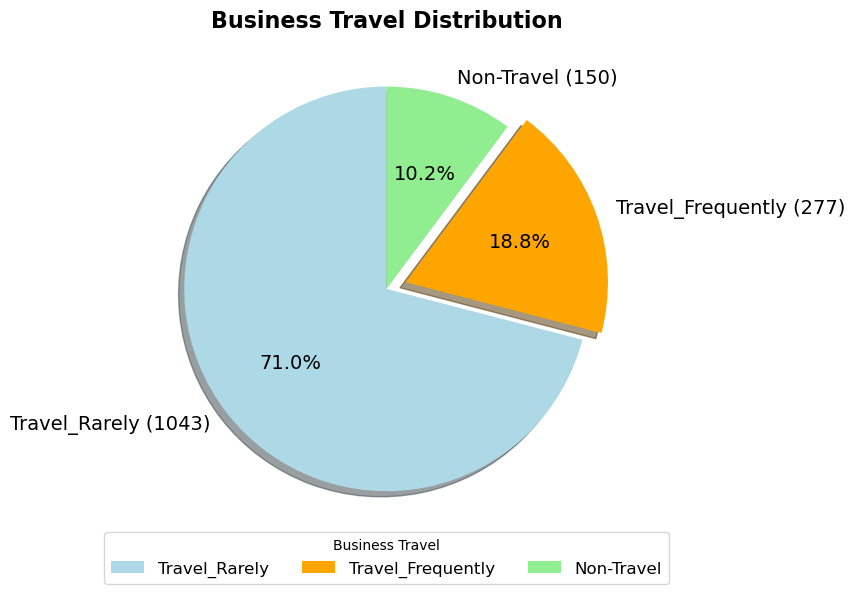

In [18]:
# Plot Business Travel Distribution
plt.figure(figsize=(8, 6))
business_travel_counts = employee_df['BusinessTravel'].value_counts()

# Define colors and explode for better visualization
colors = ["lightblue", "orange", "lightgreen"]
explode = (0, 0.1, 0)  # Highlight the second category (e.g., Travel_Frequently)

# Create labels with both count and percentage
labels = [f"{label} ({count})" for label, count in zip(business_travel_counts.index, business_travel_counts)]

# Create a pie chart
plt.pie(business_travel_counts, 
        labels=labels, 
        shadow=True, 
        explode=explode, 
        colors=colors, 
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 14, 'color': 'black'})

# Title
plt.title('Business Travel Distribution', fontsize=16, fontweight='bold')

# Add a legend for clarity
plt.legend(business_travel_counts.index, loc="lower center", bbox_to_anchor=(0.5, -0.1),fontsize=12, title="Business Travel",ncol=3)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



## ✈️ Key Insights from Business Travel Distribution:

- **📉 Majority Travel Rarely:** **71% of employees travel rarely**, suggesting that most roles do not require frequent business travel.
- **🌍 High-Frequency Travelers:** **18.8% of employees travel frequently**, indicating a significant workforce segment involved in high-mobility roles.
- **🏡 Limited Non-Travel Roles:** Only **10.2% of employees do not travel**, showing that business travel is a core part of operations for most employees.


#### Performance Rating Distribution

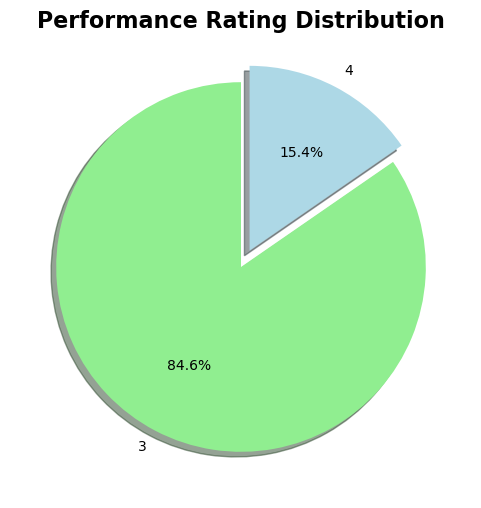

In [21]:
plt.figure(figsize=(6, 6))
performance_counts = employee_df['PerformanceRating'].value_counts()
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', 
        colors=["lightgreen", "lightblue"], startangle=90, shadow=True, explode=(0, 0.1))
plt.title("Performance Rating Distribution", fontsize=16, fontweight='bold')
plt.show()

## 🌟 Key Insights from Performance Rating Distribution:

- **📊 Majority Rated 3:** **84.6% of employees have a performance rating of 3**, indicating a strong consistency in performance across the workforce.
- **🏆 High Performers are Limited:** Only **15.4% of employees received a rating of 4**, suggesting that high performance is recognized but not widespread.
- **🚀 Opportunity for Growth:** The low percentage of top-rated employees highlights a potential area for **training, motivation, and performance improvement initiatives**.


#### Age Distribution of Employees

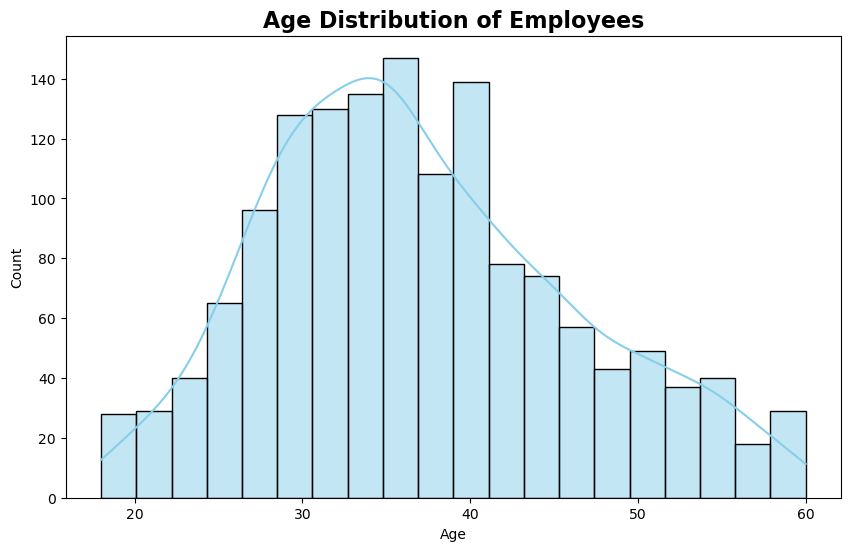

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(employee_df['Age'], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Employees", fontsize=16, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## 📊 Key Insights from Age Distribution of Employees:

- **👥 Young & Mid-Age Workforce Dominates:** The majority of employees fall within the **25-40 age range**, indicating a dynamic and experienced workforce.
- **📈 Peak at Early 30s:** The **highest concentration of employees is around the early 30s**, suggesting a strong representation of mid-career professionals.
- **🔄 Balanced Experience Levels:** While younger employees are more prevalent, the presence of **older employees ensures a mix of fresh ideas and seasoned expertise**.


#### Education Field Distribution

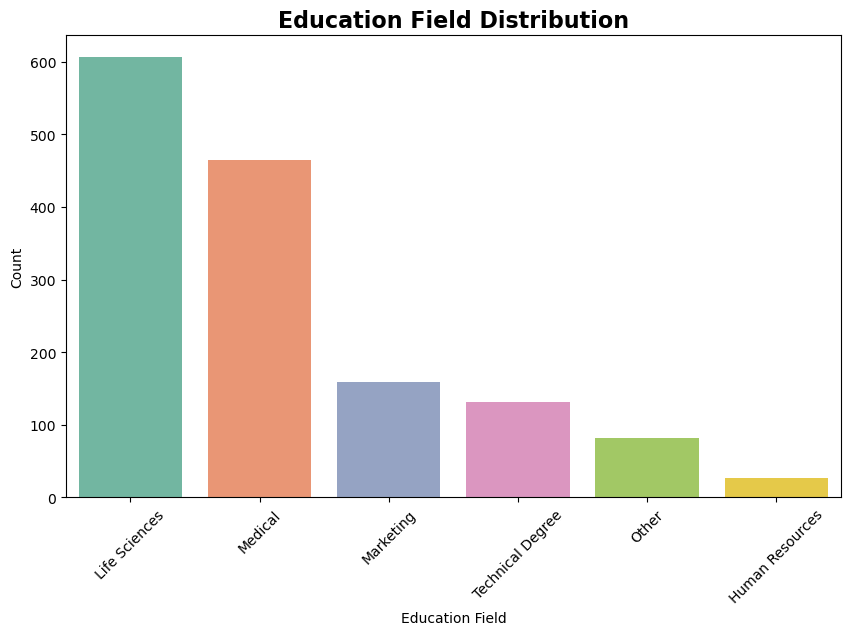

In [27]:
plt.figure(figsize=(10, 6))
education_counts = employee_df['EducationField'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, palette="Set2")
plt.title("Education Field Distribution", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.show()

## 🎓 Key Insights from Education Field Distribution:

- **🔬 Life Sciences & Medical Fields Lead:** The majority of employees come from **Life Sciences (600+) and Medical (500+) backgrounds**, indicating a strong focus on healthcare and research expertise.
- **📊 Low Representation in Business & HR:** **Marketing, Technical Degrees, and Human Resources** have significantly fewer employees, highlighting potential gaps in business and technical skills.
- **🚀 Opportunity for Diversification:** Investing in **cross-functional training and hiring** from underrepresented fields can bring fresh perspectives and enhance workforce capabilities.


#### Years at Company Distribution

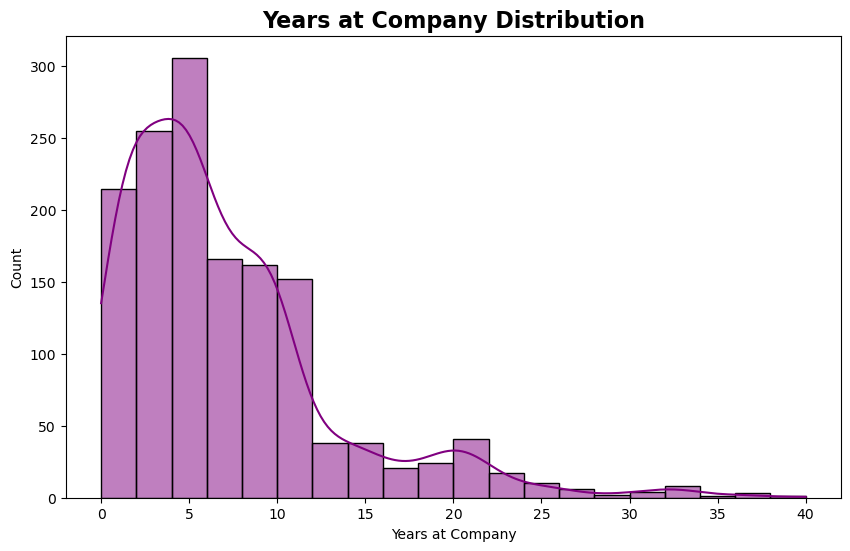

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(employee_df['YearsAtCompany'], bins=20, kde=True, color="purple")
plt.title("Years at Company Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.show()

## 📊 Key Insights on Employee Tenure:

- **🔄 High Employee Turnover in Early Years:** A significant number of employees leave within **the first 5 years**, indicating retention challenges.
- **📉 Gradual Decline in Long-Term Employees:** The number of employees drops sharply after **10 years**, suggesting fewer employees stay for extended periods.
- **🚀 Opportunity for Retention Strategies:** Implementing **career growth programs, mentorship, and employee engagement initiatives** can improve long-term retention.


#### Job Satisfaction by Department

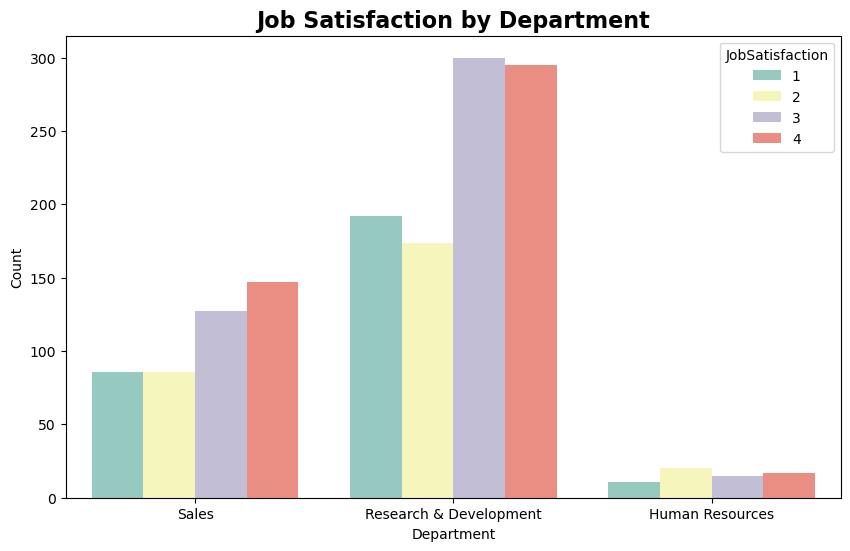

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_df, x='Department', hue='JobSatisfaction', palette="Set3")
plt.title("Job Satisfaction by Department", fontsize=16, fontweight='bold')
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

## 🏢 Job Satisfaction Insights Across Departments:

- **🚀 Research & Development Leads in Job Satisfaction:** 
  - The highest job satisfaction (Levels **3 & 4**) is observed in **Research & Development**.
  - This suggests strong engagement, possibly due to **innovation-driven work** and **growth opportunities**.

- **📉 Sales Shows Mixed Satisfaction Levels:**
  - Moderate job satisfaction across levels, with **lower engagement in Levels 1 & 2**.
  - Potential factors: **high-pressure roles, targets, and lack of career growth**.

- **📌 Human Resources Has the Least Representation:** 
  - Fewer employees, with job satisfaction spread across all levels.
  - Small team size may influence **diverse satisfaction perceptions**.




#### Monthly Income Distribution by Job Role

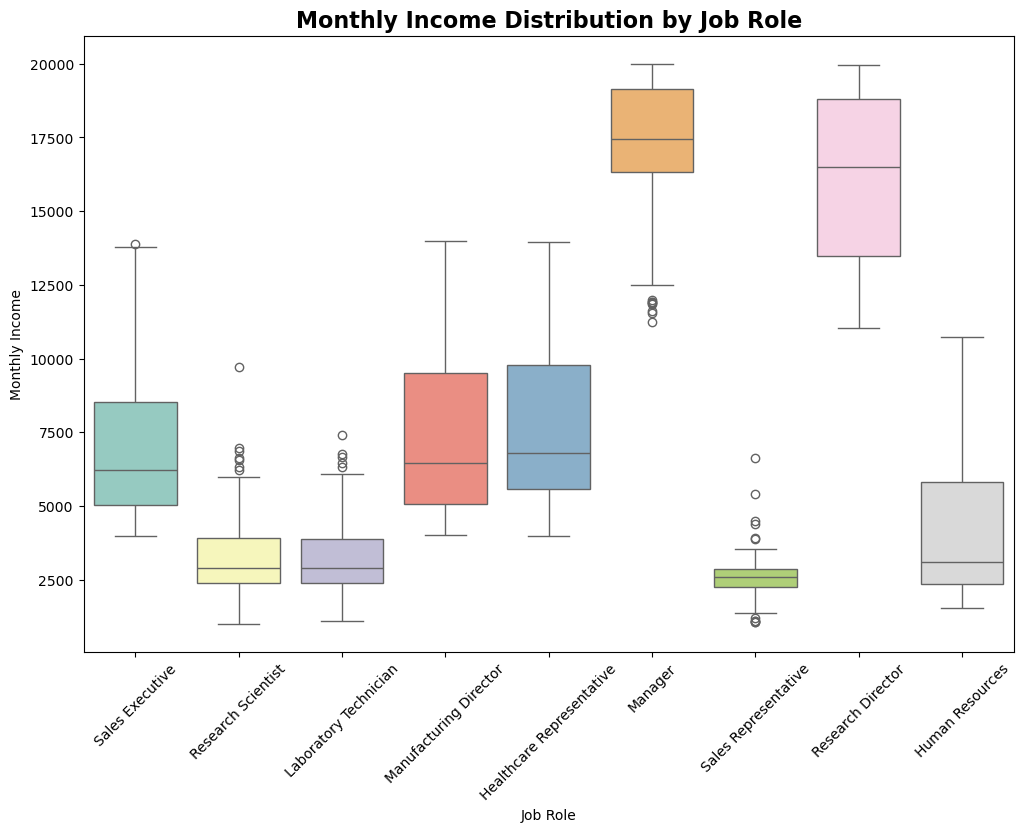

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=employee_df, x='JobRole', y='MonthlyIncome', palette="Set3")
plt.title("Monthly Income Distribution by Job Role", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.show()

## 📊 Monthly Income Distribution by Job Role:

### 🔝 **Highest-Paid Job Roles**:
1. **Research Director & Manager** 💰💼:
   - Median salary significantly higher than other roles.

2. **Manufacturing & Healthcare Directors** 🏭🏥:
   - Strong earning potential with a **wide salary range**.

### 📉 **Lower-Paid Roles**:
1. **Sales Representative & Research Scientist** 📢🔬:
   - **Lower median income** with minimal variation.

2. **Laboratory Technicians & HR Professionals** 🧪📋:
   - **Consistently low salaries** with limited growth.




#### Work-Life Balance

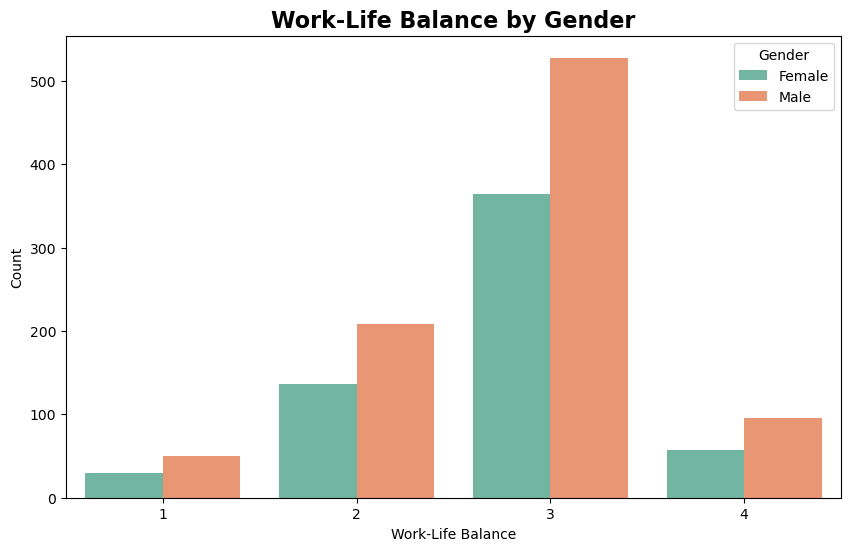

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_df, x='WorkLifeBalance', hue='Gender', palette="Set2")
plt.title("Work-Life Balance by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Work-Life Balance")
plt.ylabel("Count")
plt.show()

## ⚖️ Work-Life Balance by Gender:

### 🔹 **Most Employees Rate Work-Life Balance as "3"**:
- **Majority of both Male & Female employees** rated their work-life balance as **3 (Moderate)**.

### 🔹 **Poor Work-Life Balance (Rating 1 & 2)**:
- **More males reported lower work-life balance (Rating 2 & 1)** than females.

### 🔹 **Good Work-Life Balance (Rating 4)**:
- A **higher number of males rated work-life balance as 4** compared to females.





#### Employee Count by Department

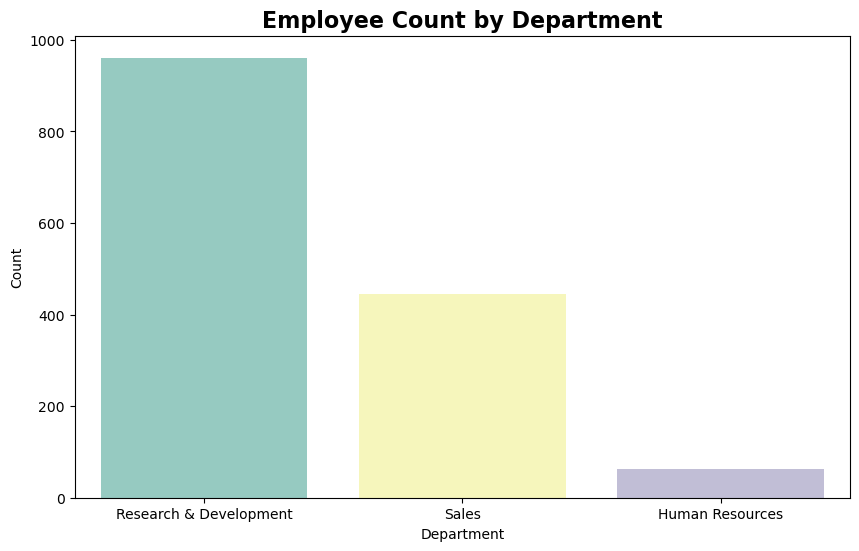

In [42]:
plt.figure(figsize=(10, 6))
department_counts = employee_df['Department'].value_counts()
sns.barplot(x=department_counts.index, y=department_counts.values, palette="Set3")
plt.title("Employee Count by Department", fontsize=16, fontweight='bold')
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

## 🚀 Key Insights: Employee Count by Department  

- **🔬 Research & Development Dominates**: The **R&D department has the highest workforce**, nearly **double** that of the Sales team.  
- **📈 Sales Team is Mid-Sized**: While **Sales has a significant presence**, it's still **less than half** of the R&D workforce.  
- **👥 Human Resources is Minimal**: The **HR department is the smallest**, highlighting a potential **gap in workforce support & employee management**.  



#### Attrition by Department, Job Role, and Gender

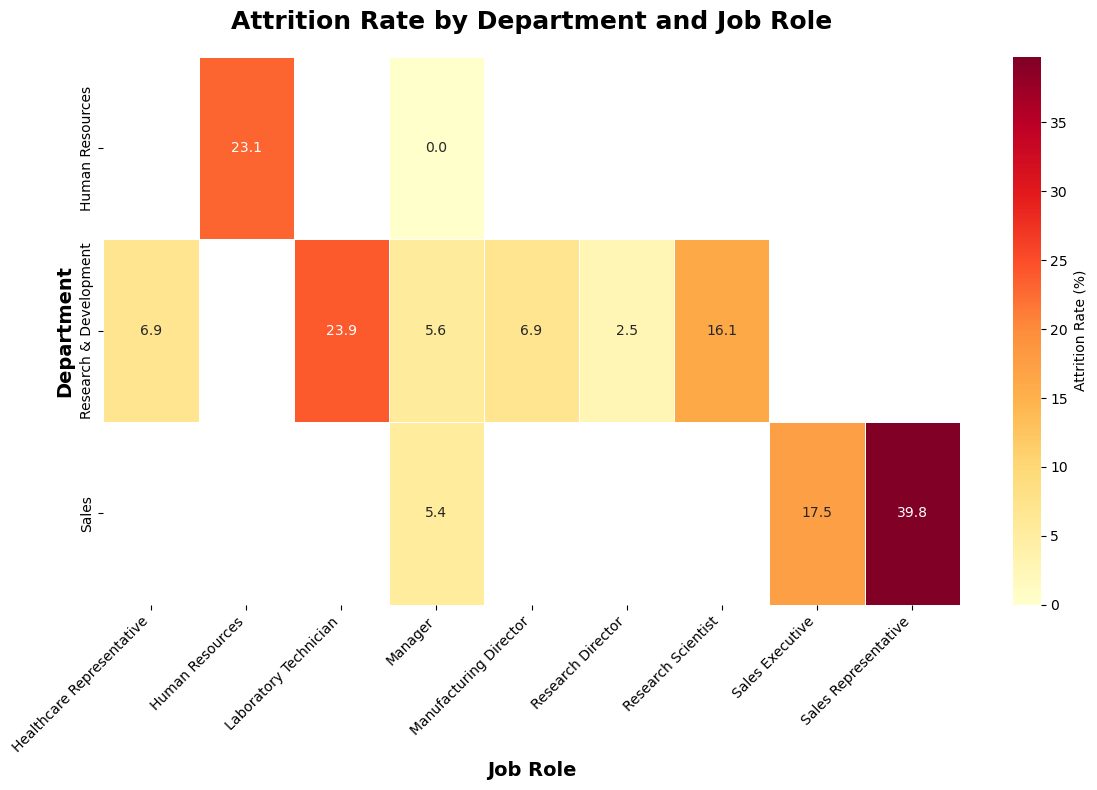

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate attrition rate by department and job role
attrition_rate = employee_df.groupby(['Department', 'JobRole'])['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).unstack()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(attrition_rate, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': 'Attrition Rate (%)'})

# Add title and labels
plt.title("Attrition Rate by Department and Job Role", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Job Role", fontsize=14, fontweight='bold')
plt.ylabel("Department", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 🔥 Key Insights: Attrition Rate by Department & Job Role

- **🚨 Sales Team Faces the Highest Turnover**: The **Sales Representative** role has the **highest attrition rate (39.8%)**, indicating a major **retention challenge**.  
- **⚠️ Laboratory Technicians & HR Also at Risk**: The **Laboratory Technician (23.9%)** in R&D and **HR (23.1%)** roles also show **concerningly high** attrition rates.  
- **📉 Leadership & Niche Roles Have Low Attrition**: **Managers, Research Directors, and Manufacturing Directors** show the **lowest** attrition rates, suggesting **stability in leadership & specialized positions**.  



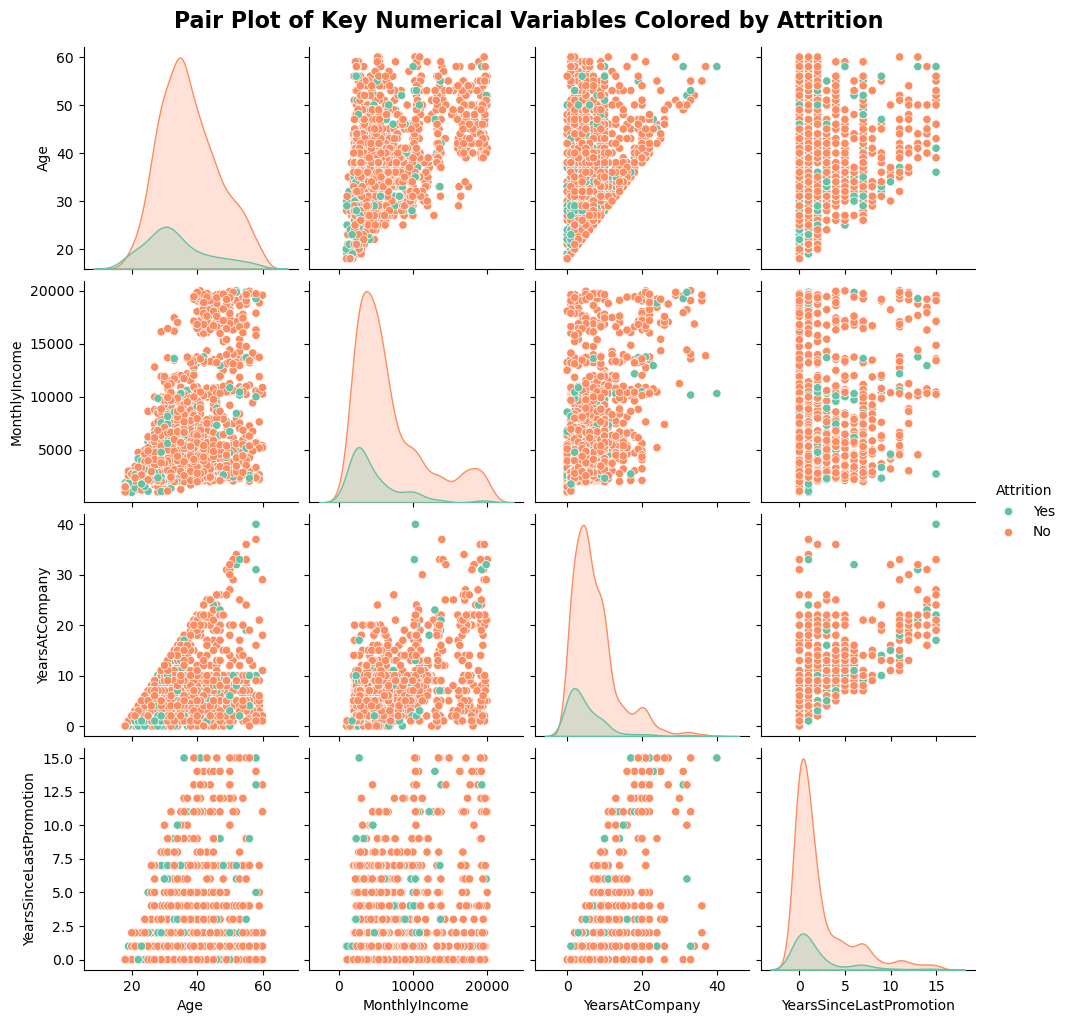

In [47]:
# Select key numerical variables
numerical_vars = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'YearsSinceLastPromotion']

# Create a pair plot
sns.pairplot(employee_df[numerical_vars + ['Attrition']], hue='Attrition', palette="Set2", diag_kind='kde')
plt.suptitle("Pair Plot of Key Numerical Variables Colored by Attrition", fontsize=16, fontweight='bold', y=1.02)
plt.show()

#### Attrition by Business Travel and Gender

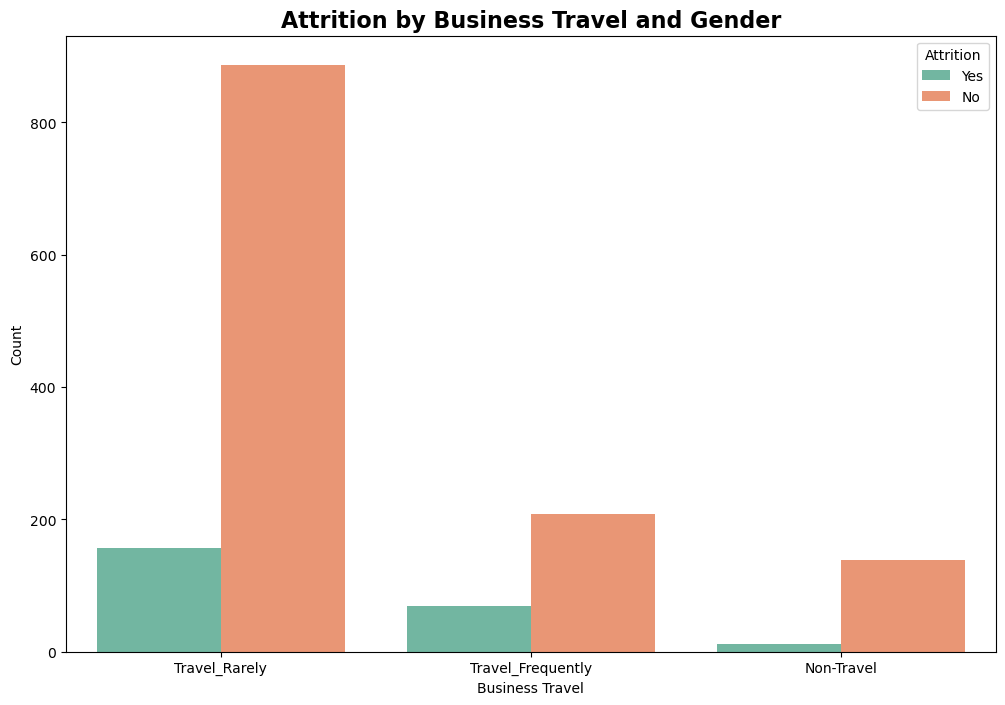

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(data=employee_df, x='BusinessTravel', hue='Attrition', palette="Set2", 
              order=employee_df['BusinessTravel'].value_counts().index)
plt.title("Attrition by Business Travel and Gender", fontsize=16, fontweight='bold')
plt.xlabel("Business Travel")
plt.ylabel("Count")
plt.legend(title="Attrition", loc="upper right")
plt.show()

## 🚀 Key Insights on Employee Attrition & Business Travel  

- **✈️ Employees Who Travel Frequently Have Higher Attrition**: Employees who **travel frequently** are at a **higher risk of leaving**, indicating **dissatisfaction with work-life balance**.  
- **📉 Limited Travel Doesn't Guarantee Retention**: Even **non-traveling employees** experience attrition, suggesting that **factors beyond travel, like workplace culture or growth opportunities, matter**.  
- **⚠️ Rare Travelers Make Up the Largest Attrition Pool**: The **majority of employees who leave** fall under the **Travel_Rarely** category, highlighting a need for **engagement strategies for occasional travelers**.  


#### Correlation Matrix

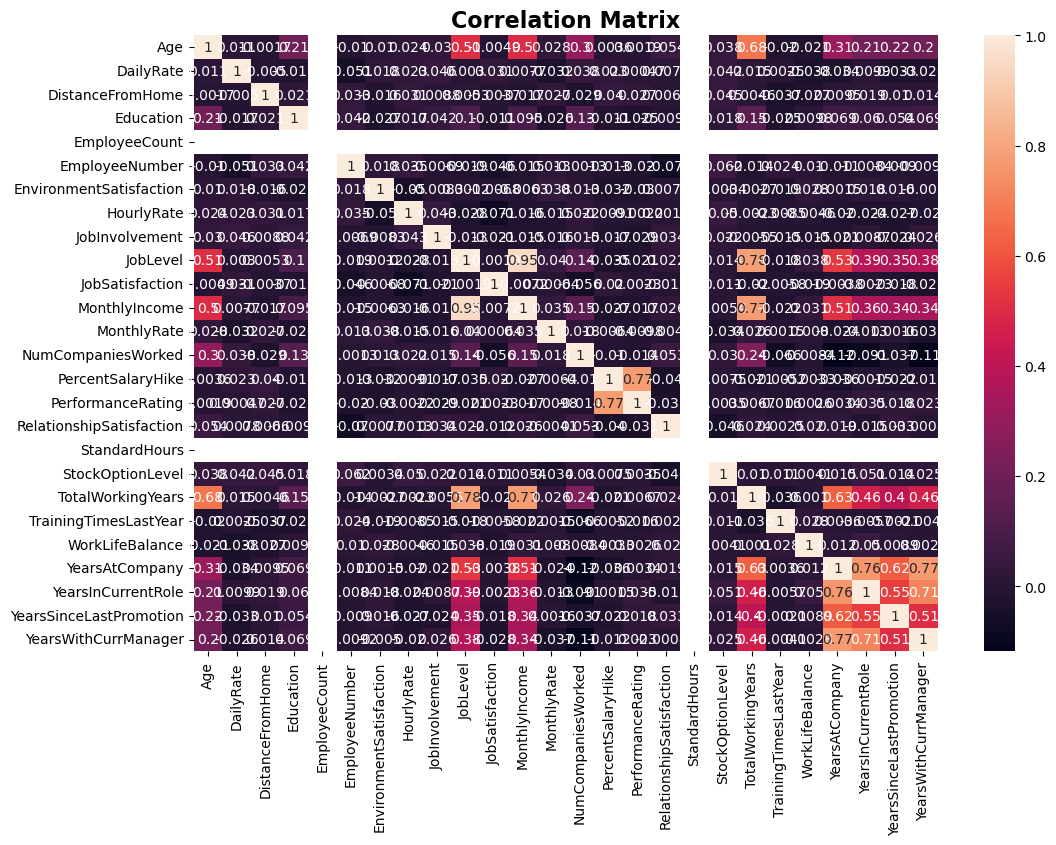

In [52]:
plt.figure(figsize=(12, 8))
sns.heatmap(employee_df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()

In [53]:
# Remove unnecessary columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyRate']
employee_df = employee_df.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
print(employee_df.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  JobInvolvement  \
0          2  Life Sciences                        2  Female               3   
1          1  Life Sciences                        3    Male               2   
2          2          Other                        4    Male               2   
3          4  Life Sciences                        4  Female               3   
4          1        Medical                        1    Male               3   

   ...  PerformanceRating Relati

#### Features Selection

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary categorical columns
employee_df['Attrition'] = label_encoder.fit_transform(employee_df['Attrition'])
employee_df['OverTime'] = label_encoder.fit_transform(employee_df['OverTime'])
employee_df['Gender'] = label_encoder.fit_transform(employee_df['Gender'])

In [56]:
# Perform One-Hot Encoding for multi-category columns
employee_df = pd.get_dummies(employee_df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

In [57]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                     'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                     'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                     'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
                     'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Apply StandardScaler
scaler = StandardScaler()
employee_df[numerical_columns] = scaler.fit_transform(employee_df[numerical_columns])

#### Data Splitting

In [59]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = employee_df.drop('Attrition', axis=1)  # Features (all columns except 'Attrition')
y = employee_df['Attrition']  # Target variable ('Attrition')

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Building

#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred_lg = logreg.predict(X_test)

#### Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#### Support Vector Machine (SVM)

In [66]:
from sklearn.svm import SVC

# Train SVM Model
svm_model = SVC(random_state=42, probability=True)  # Enable probability for AUC-ROC
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#### DecisionTree

In [67]:
from sklearn.tree import DecisionTreeClassifier 

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree Classifier
dt_model.fit(X_train, y_train)  # Fit the model on training data
y_pred_dt = dt_model.predict(X_test)

#### Evaluate Models

In [69]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Store models and predictions in a dictionary
models = {
    "Logistic Regression": (logreg, y_pred_lg),
    "Random Forest": (rf_model, y_pred_rf),
    "SVM": (svm_model, y_pred_svm),
    "DecisionTreeClassifier ":(dt_model, y_pred_dt)
}

# Evaluate each model
for model_name, (model, y_pred) in models.items():
    # Get predicted probabilities for AUC-ROC (only for models that support it)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "Not Available"

    # Print classification report and metrics
    print("=" * 50)
    print(f"{model_name} Evaluation:")
    print("=" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50, "\n")

Logistic Regression Evaluation:
Accuracy: 0.8844
Precision: 0.5926
Recall: 0.4103
F1-Score: 0.4848
AUC-ROC: 0.795676219205631

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294


Random Forest Evaluation:
Accuracy: 0.8741
Precision: 0.7500
Recall: 0.0769
F1-Score: 0.1395
AUC-ROC: 0.7452991452991453

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294


SVM Evaluation:
Accuracy: 0.8878
Precision: 1.000

#### Saving the trained model

In [71]:
import pickle

# Save the trained model to a pickle file
with open("logistic_regression_model.pkl", "wb") as model_file:
    pickle.dump(logreg, model_file)

print("Model saved successfully as logistic_regression_model.pkl")


Model saved successfully as logistic_regression_model.pkl
